In [1]:
source("/home/user/data2/lit/bin/lit_utils.R")
lib_text()
lib_plot()

# 饱和度分析

,reads,unique_genes,unique_isoforms,unique_genes_known,unique_isoforms_known
,<int>,<int>,<int>,<int>,<int>
1,10000,1280,1434,1280,1407
2,20000,2369,2818,2369,2725
3,30000,3272,4067,3272,3899
4,40000,3964,5151,3964,4890
5,50000,4572,6134,4572,5780
6,60000,5074,7068,5074,6611


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


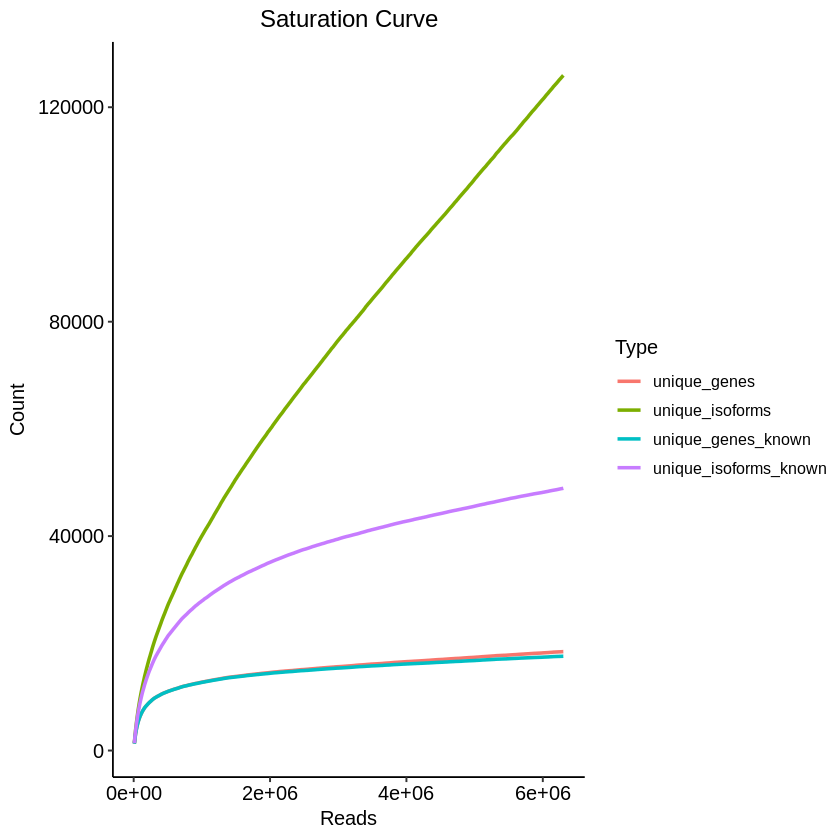

In [2]:
# 加载所需包
library(ggplot2)
library(reshape2)  # 用于数据转换

# 读取数据
df <- read.table("../processed/saturation.txt", header=TRUE, sep="\t")

# 查看前几行
head(df)

# 数据转换为长格式，便于 ggplot2 绘制多条曲线
df_long <- melt(df, id.vars = "reads", 
                measure.vars = c("unique_genes", "unique_isoforms", "unique_genes_known", "unique_isoforms_known"),
                variable.name = "Type", value.name = "Count")

# 绘制饱和曲线
p <- ggplot(df_long, aes(x=reads, y=Count, color=Type)) +
  geom_line(size=1) +
  labs(title="Saturation Curve", x="Reads", y="Count") +
  theme_3() +
  theme(plot.title = element_text(hjust = 0.5))+
theme(legend.position = "right")

print(p)

In [7]:
head(df_long)

,reads,Type,Count
,<int>,<fct>,<int>
1,10000,unique_genes,1280
2,20000,unique_genes,2369
3,30000,unique_genes,3272
4,40000,unique_genes,3964
5,50000,unique_genes,4572
6,60000,unique_genes,5074


In [3]:
ggsave(p,filename = "../figures/saturation.curve.pdf")

Saving 6.67 x 6.67 in image


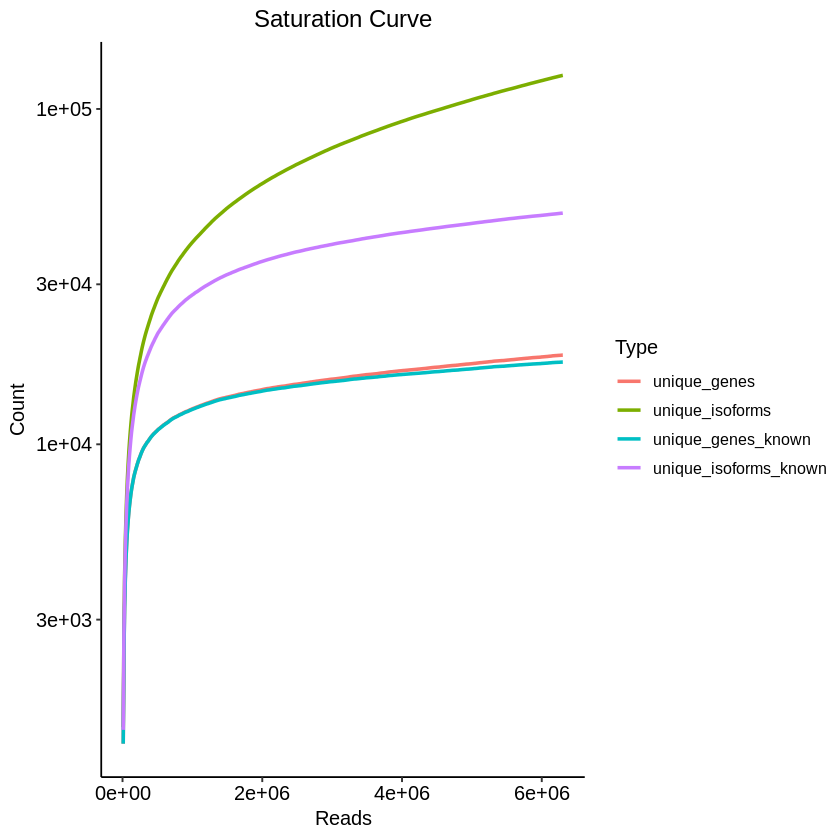

In [8]:
ggplot(df_long, aes(x=reads, y=Count, color=Type)) +
  geom_line(size=1) +
  scale_y_log10() +
  labs(title="Saturation Curve", x="Reads", y="Count") +
  theme_3() +
  theme(plot.title = element_text(hjust = 0.5))+
theme(legend.position = "right")

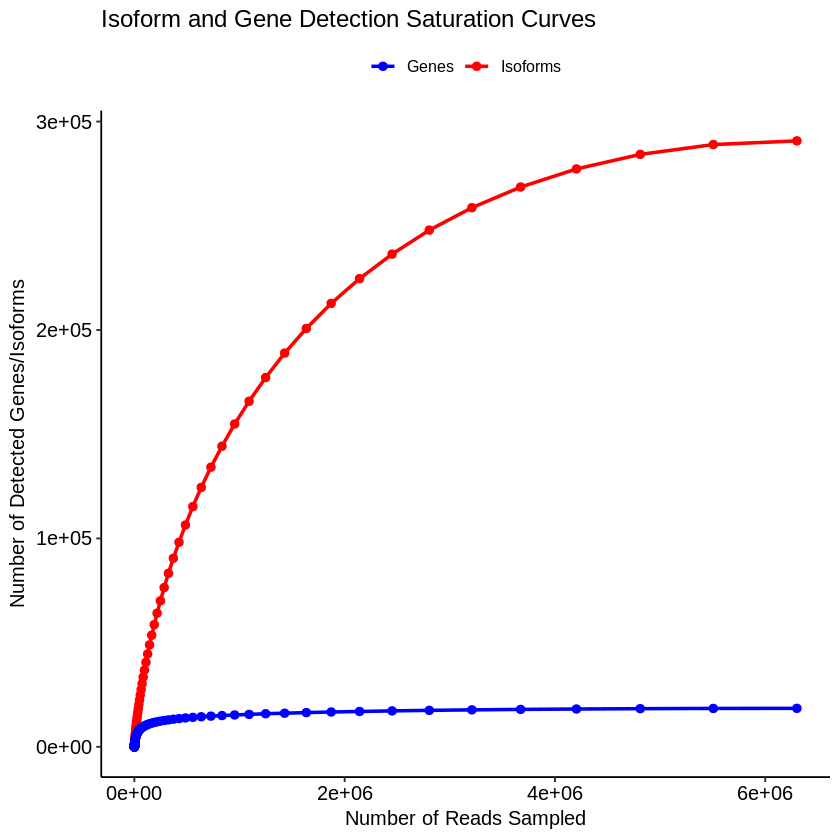

In [32]:
ggplot(data, aes(x = sample_size)) +
  geom_line(aes(y = mean_isoforms, color = "Isoforms"), size = 1) +
  geom_point(aes(y = mean_isoforms, color = "Isoforms"), size = 2) +
  geom_line(aes(y = mean_genes, color = "Genes"), size = 1) +
  geom_point(aes(y = mean_genes, color = "Genes"), size = 2) +
  scale_color_manual(values = c("Isoforms" = "red", "Genes" = "blue")) +
  labs(title = "Isoform and Gene Detection Saturation Curves",
       x = "Number of Reads Sampled", y = "Number of Detected Genes/Isoforms",color=NULL) +
  theme_3() -> p
p
# 保存图片
ggsave(p,filename = "../figures/saturation_curve_custom.pdf", width = 8, height = 6, dpi = 300)

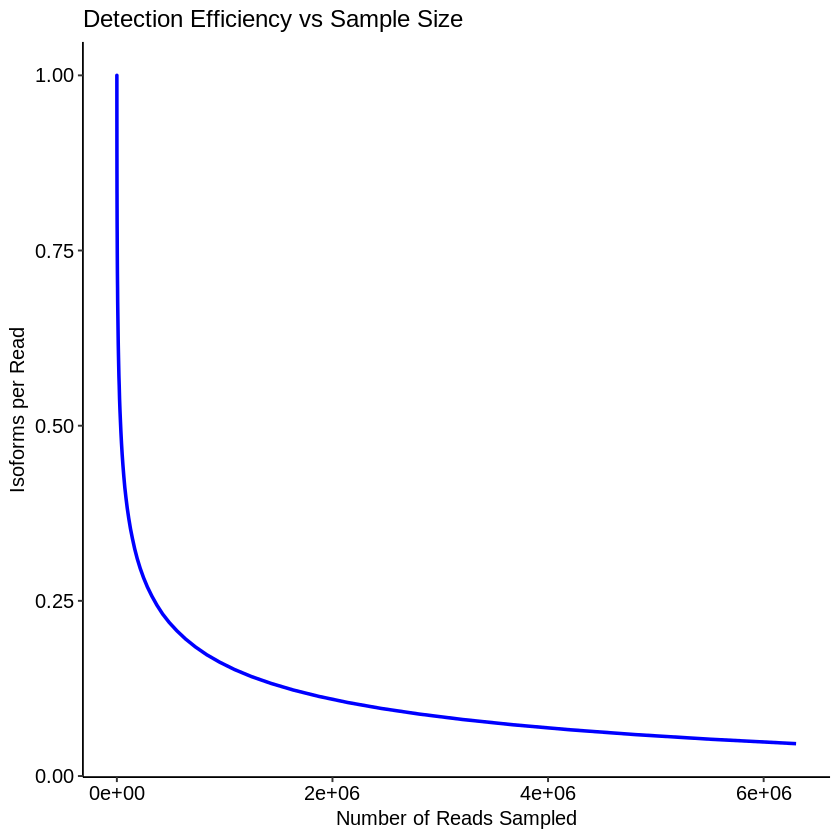

In [24]:
# 绘制效率曲线
ggplot(data, aes(x = sample_size, y = efficiency_isoforms)) +
  geom_line(color = "blue", size = 1) +
  # geom_point(color = "blue", size = 2) +
  labs(title = "Detection Efficiency vs Sample Size",
       x = "Number of Reads Sampled",
       y = "Isoforms per Read") +
  theme_3()

# 保存图片
# ggsave("efficiency_curve.png", width = 8, height = 6, dpi = 300)